**This is a mini project on EDA on Haberman dataset.**

**First, we will import all the necessary libraries as shown below.**

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberdata=pd.read_csv('haberman.csv')
#haberdata

In [16]:
print(haberdata.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [17]:
print(haberdata.shape)
#will give us the number of rows and columns

(306, 4)


In [18]:
print(haberdata.columns)
#will get to know the name of columns.

Index(['age', 'year', 'nodes', 'status'], dtype='object')


<b>1)</b>Age:- It represents the age of the patients undergone the surgery. It ranges from 30 to 83. (Can be determine by the code: haberdata['age']

<b>2)</b>Year- Year in which the patients had the operation.It ranges from 1958–1969.

<b>3)</b>Nodes:- A lymph node, or lymph gland is a kidney-shaped organ of the lymphatic system, and the adaptive immune system.(referance:-https://en.wikipedia.org/wiki/Lymph_node)

<b>4)</b>Status:- Denoted by 1 and 2. 1 means the patient survived 5 years or longer and 2 means the patient died within 5 year.

In [19]:
haberdata['status'].value_counts()

status
1    225
2     81
Name: count, dtype: int64

*From the above code we can conclude that out of 306 patients(that we got from the code 'haberdata.shape'), 225 patients survived 5 years or longer and sadly 81 patients died within 5 years.*

**Status will be the class label.**

**                ------------------------------              **


**Now we shall plot some graphs to interpret the information better.**

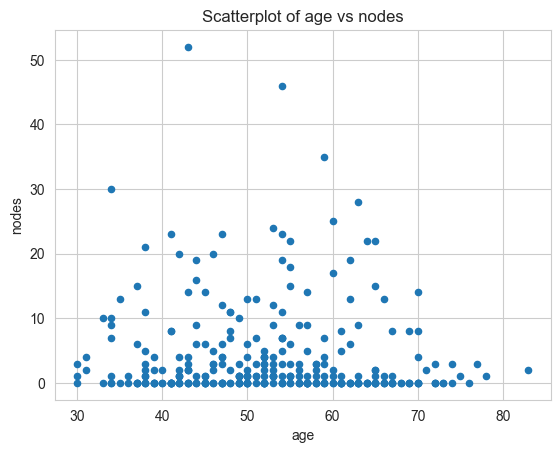

In [20]:
haberdata.plot(kind='scatter',x='age',y='nodes')
plt.title('Scatterplot of age vs nodes')
plt.show()

*The above plot does not give a better understanding as the colour is same and also a lot of points are overlapping*

**                ------------------------------              **


*Lets use seaborn library which has very good representation.*

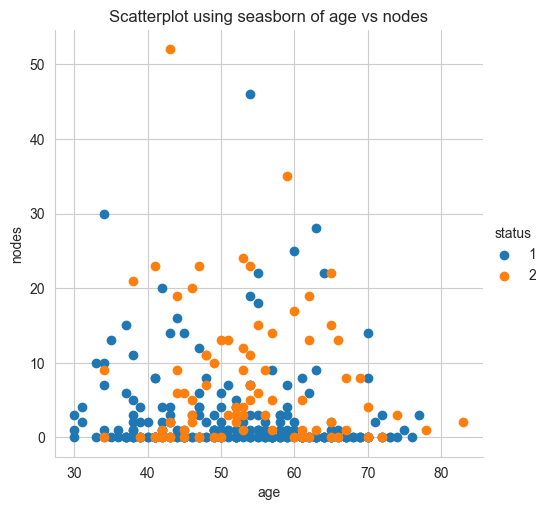

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(haberdata,hue='status',height=5) \
.map(plt.scatter,'age','nodes')\
.add_legend()
plt.title('Scatterplot using seasborn of age vs nodes')
plt.show()

*Here we used seaborn for 2-D scatter plotting. Here blue and orange dots represent the survival status of the patients.
blue represents the patient survived 5 years or longer and orange dot represents the patient died within 5 year.*

*As we can see, we cannot point out good and solid information out of this plot. Here we used 3 features for plotting.*

**                ------------------------------              **


*How should we know which features will give us better plots so that we can classify the information better. For that we use pairplots.*

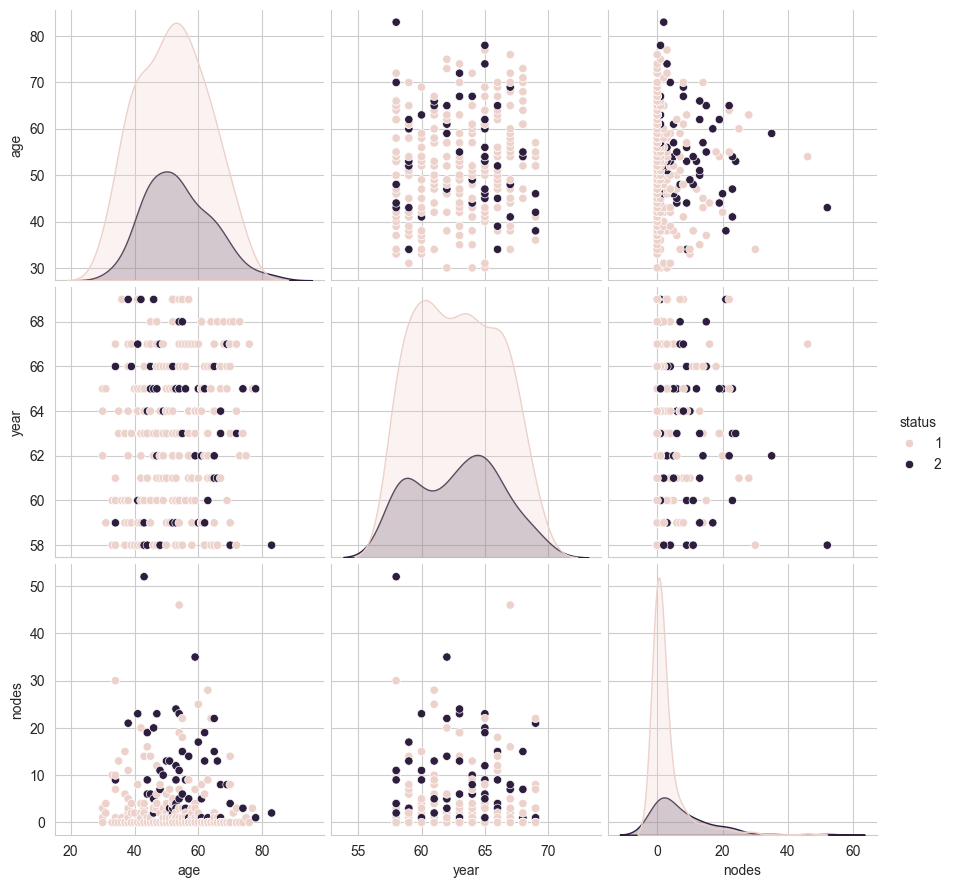

In [22]:
sns.set_style('whitegrid')
sns.pairplot(haberdata,hue='status',height=3)
plt.show()

*Here there are 9 plots. The features are age, nodes and year. The reason why there is no status is because the plotting is done onthe basis of status. The legend is status.*

*The plot 1, plot 5 and plot 9 are known as histograms. We wont be doing any analysis of these plots now.*

*The plot 4 ,plot 7 and plot 8 are the inverted plots of plot 2, plot 3 and plot 6 respectively.*

**Observations**

**Plot2:-** *Here the plot is age vs year. It is certainly difficult to read and thus will reject this plot for any conclusion*

**Plot3:-** *The plot is between age and nodes. It is also very hard to read and carry out any observations. so rejecting this plot too.

**Plot6:-** *This plot is fairly redable compared to the other two but certainly we cannot make any concrete observations based on this graph.*

**                ------------------------------              **


*Now the pair plots did not give a good reading about the case, so we'll shift towards plotting 1-D plotting.*

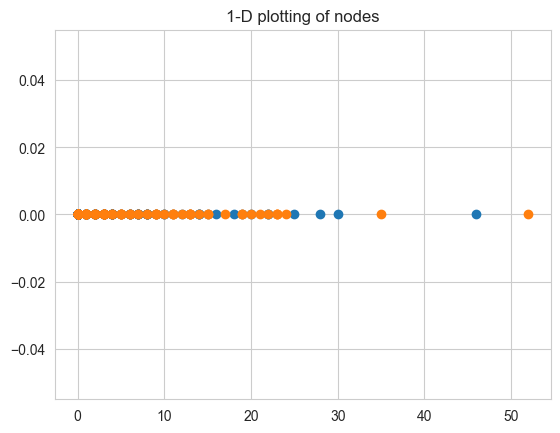

In [23]:
status_1=haberdata.loc[haberdata['status']==1]
status_2=haberdata.loc[haberdata['status']==2]
plt.plot(status_1['nodes'],np.zeros_like(status_1['nodes']),'o')
plt.plot(status_2['nodes'],np.zeros_like(status_2['nodes']),'o')
plt.title('1-D plotting of nodes')

plt.show()

*Not at all readable. Very complicated and overlapping points present.*

**                ------------------------------              **


*We can get clarification if we use PDF and CDF for this.*

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Histogram of age')

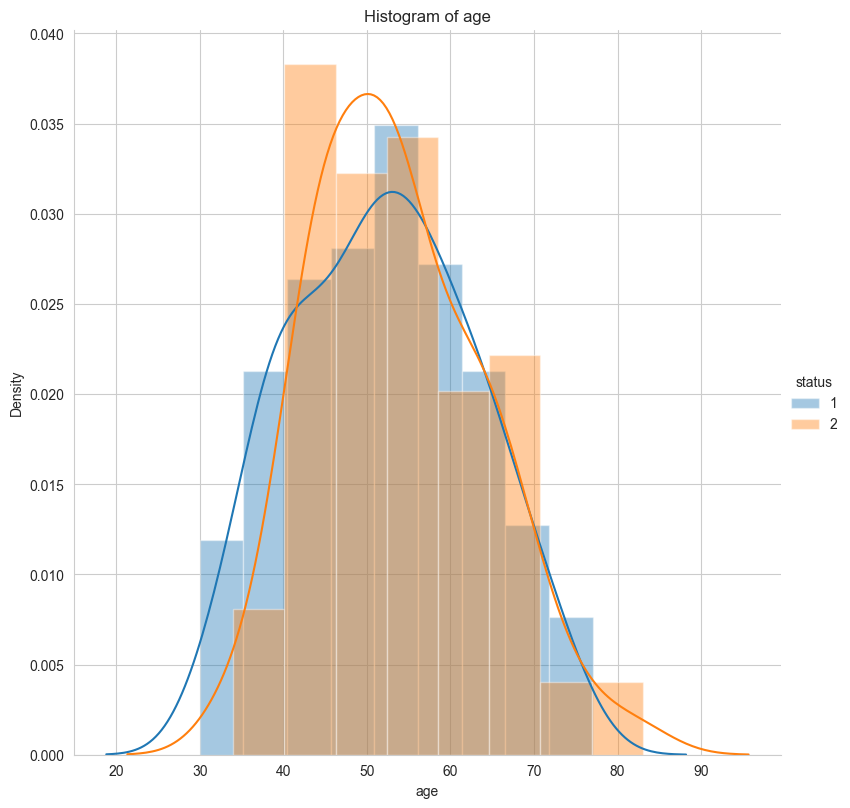

In [26]:
#PDF for age
sns.FacetGrid(haberdata,hue='status', height=8)\
.map(sns.distplot,'age')\
.add_legend()
plt.title('Histogram of age')


*This figure shows that the chances of survival between 30-70(approx) is same.*

*No other coclusion can be determined*

**                ------------------------------              **


*we shall jump to the next feature.*

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


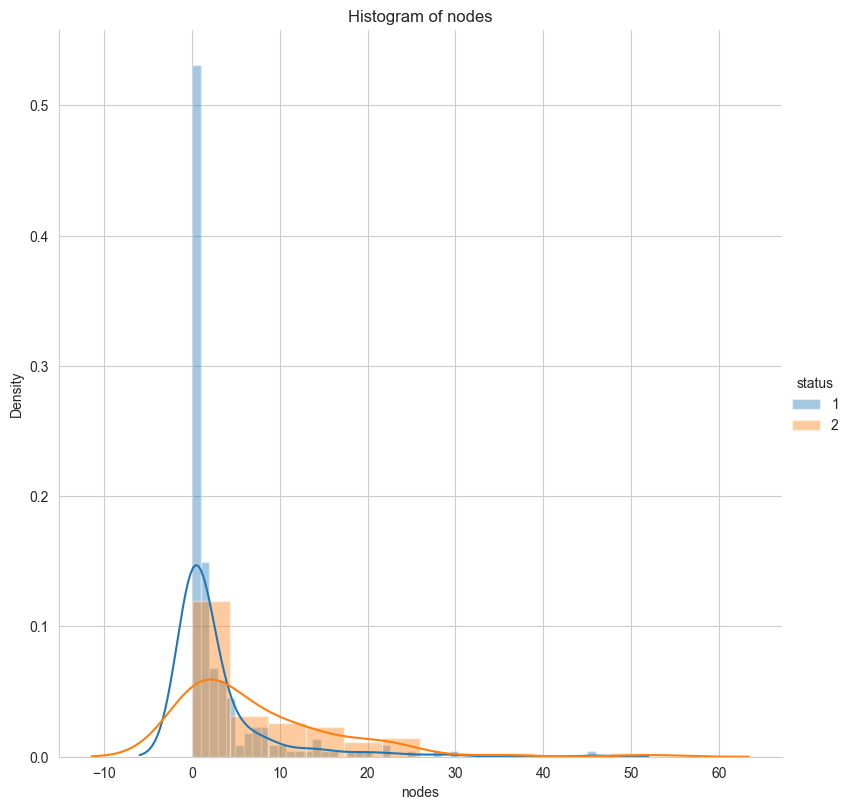

In [27]:
#PDF for nodes
sns.FacetGrid(haberdata,hue='status',height=8)\
.map(sns.distplot,'nodes')\
.add_legend()
plt.title('Histogram of nodes')
plt.show()

*This is a plot where we can make some assumptions and predictions but yet it is not definitive. we can only make approximate decisions*

**Observations**

*Here we can see that the chances of long survival is the highest when the number of nodes <=0 , also the chances of long survival decreases with the increase in number of nodes. We can suggest that the chances of long survival are the least when the nodes>25*

**Code(not as per syntax)**
*if nodes<=0:*

        person will live more than 5 years
        
 *elif nodes>=0 and nodes<=5:*
         
        person has good chance of surviving long
         
 *else(nodes>5.1):*

         person will have short lifespan
         
**                ------------------------------              **



*Lets jump onto the last feature to makes sure if we can find a plot way cleaner than this.*

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


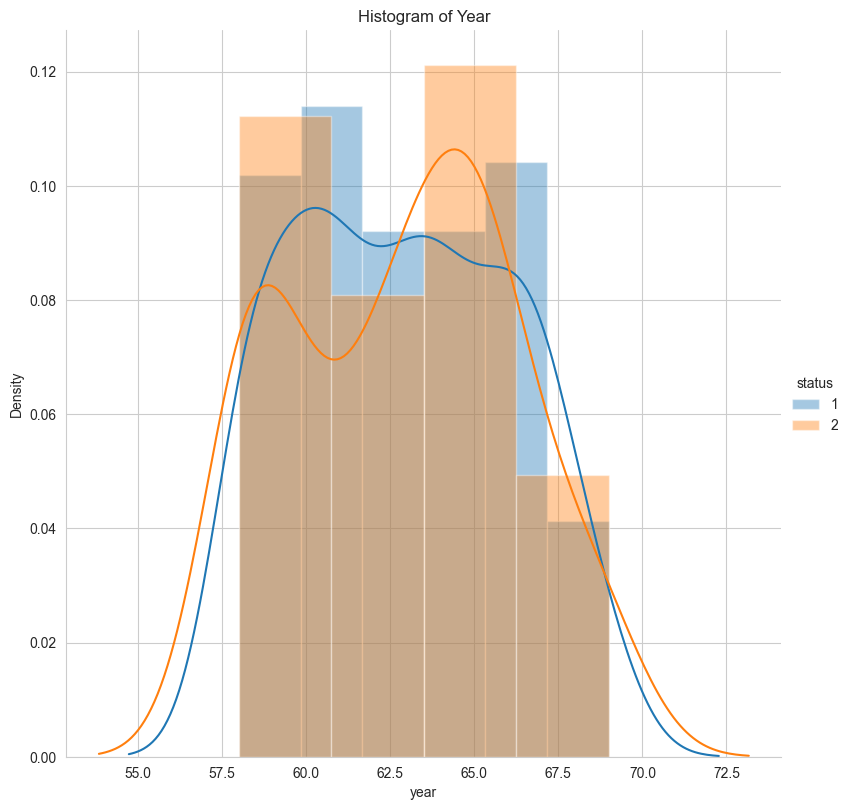

In [28]:
#PDF for year
sns.FacetGrid(haberdata,hue='status',height=8)\
.map(sns.distplot,'year')\
.add_legend()
plt.title('Histogram of Year')
plt.show()

*This is not at all good for predicting, as the overlapping is maximum. Nothing can be concluded from this histogram.*

**                ------------------------------              **


*Lets plot CDF and the feature we will chose is nodes becuase clearly its the defining feature in this data set*

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 0, 'nodes')

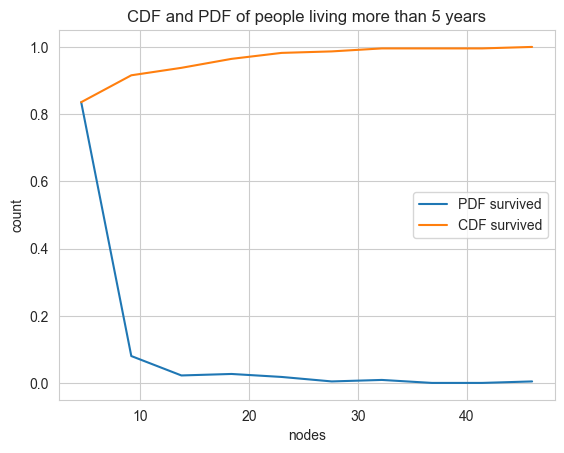

In [29]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
arr1,=plt.plot(bin_edges[1:],pdf);
arr2,=plt.plot(bin_edges[1:],cdf)
plt.title('CDF and PDF of people living more than 5 years')
plt.legend([arr1,arr2], ['PDF survived','CDF survived'])
plt.ylabel('count')
plt.xlabel('nodes')

*This is the CDF of people who survived 5 years or more. The orange line is the cdf and the blue line is the pdf of the same.*

**Observations**

*The first observation we can carry out is that the chances of survival long is minimal when the number of nodes >35. It is practically null.*

*As per the graph, approx 83% of people have chance of long survival if nodes>4(approx). Also the chances of long survival decreses with the increase of nodes.*

**                ------------------------------              **


*Will now plot CDF for people who lived for 5 or less years*

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5, 0, 'nodes')

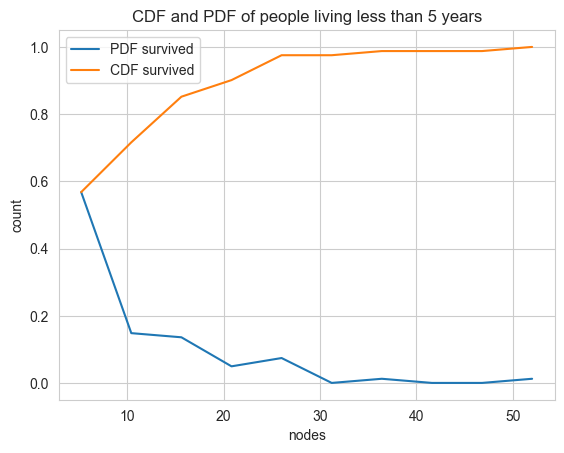

In [30]:
counts, bin_edges = np.histogram(status_2['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
arr1,=plt.plot(bin_edges[1:],pdf);
arr2,=plt.plot(bin_edges[1:],cdf)
plt.title('CDF and PDF of people living less than 5 years')
plt.legend([arr1,arr2], ['PDF survived','CDF survived'])
plt.ylabel('count')
plt.xlabel('nodes')

*This is the CDF of people lived 5 years or less*

**Observations**

*The first observation is approx 57% of people have short life if nodes<4. And sadly around 100% of people have short life when nodes>=35(approx)*

**                ------------------------------              **

*We have estabilisged nodes as our main feature. We will now determine the case with mathematical operations.*

*We will compute mean and standard deviation*

In [31]:
print('The means are:- ')
print(np.mean(status_1['nodes']))
print(np.mean(status_2['nodes']))
print('The standard deviation are:- ')
print(np.std(status_1['nodes']))
print(np.std(status_2['nodes']))

The means are:- 
2.7911111111111113
7.45679012345679
The standard deviation are:- 
5.857258449412138
9.128776076761635


**Observations**

*The mean and standard deviation is computed as follows. Here the mean of people surviving more than 5 years is 2.791. Whereas the mean of people survivng less than 5 years is 7.546.*

*As per the calculations we can deduce that the probability of people surviving less than 5 years is higher compared to the people surviving for more than 5 years in this dataset given*

*The standard deviation is basically the spread of the data. As per the calculations the spread for the people living less than 5 years (9.128) compared to the people living more tha 5 years(5.85)*

**                ------------------------------              **


*We will now calculate median, percentile and quantiles and MAD for better understanding*

In [34]:
print('\nMedians are:- ')
print(np.median(status_1['nodes']))
print(np.median(status_2['nodes']))
print('\nThe Quantiles are:- ')
print(np.percentile(status_1['nodes'],np.arange(0,100,25)))
print(np.percentile(status_2['nodes'],np.arange(0,100,25)))
print('\nThe 95th% is:- ')
print(np.percentile(status_1['nodes'],95))
print(np.percentile(status_2['nodes'],95))

from statsmodels import robust
print ("\nMedian Absolute Deviation is:- ")
print(robust.mad(status_1["nodes"]))
print(robust.mad(status_2["nodes"]))



Medians are:- 
0.0
4.0

The Quantiles are:- 
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

The 95th% is:- 
14.0
23.0

Median Absolute Deviation is:- 
0.0
5.930408874022408


**Observations**

*Here, for the people survivng more than 5 years has nodes averaging to 0 whereas people who died within 5 years has nodes averaging to 4.*

*From quantiles we can conclude that people living more than 5 years, 75% of them have 3 nodes or less that can also be deduced that 25% of people falling into this category has nodes more than 3. Also 50% of them has 0 nodes**

*on the other hand, for the people living less than 5 years, 50% of the people have 4 or less than 4 nodes and 75% of the people have less than or equal to 11 nodes.*

*95% percentile suggests that people surviving more than 5 years, 95% of them have less than or equal to 14 nodes present and on the other hand people surviving less than 5 years, have<=23 nodes*

*MAD gives us the variability of the data. Here for people survivng more than 5 years is 0 and for the second group it is 5.930*

**                ------------------------------              **


*All the necessary mathematical operations are done, Now lets plot Box plot, Violin plots and Contour plots*

<function matplotlib.pyplot.show(close=None, block=None)>

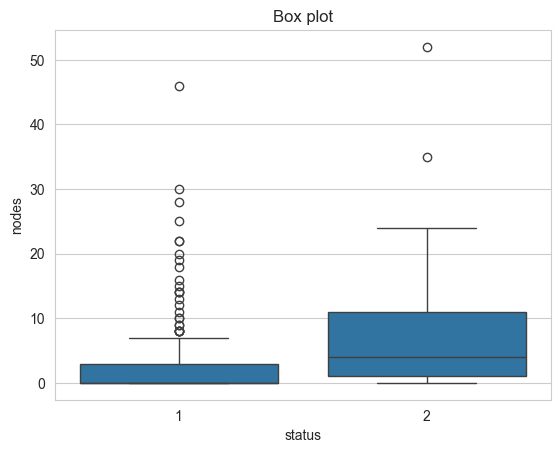

In [35]:
#Box plot
sns.boxplot(x='status',y='nodes',data=haberdata)
plt.legend
plt.title('Box plot')
plt.show

**Observations**

*The 25% and 50% of the category 1 is nearly the same. And it varies from 0 to 8. 75th% can be approx 4. On the other hand the category 2, the 50th% is equal to the 75th% percentile of the category 1.*

*the category 2 varies from 0 to 25. The 75th% is approx 12. As its 50th% is nearly same as the 75th% of category 1, so of the nodes are between 0-8,there is 50% of error in category 2.*

<function matplotlib.pyplot.show(close=None, block=None)>

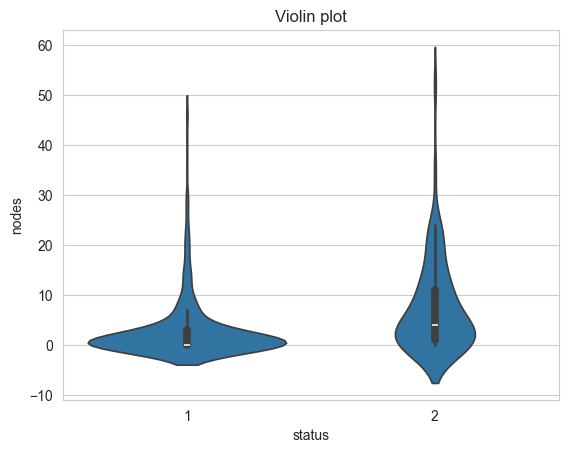

In [36]:
#Violin plot
sns.violinplot(x='status',y='nodes',data=haberdata)
plt.legend
plt.title('Violin plot')

plt.show

**observations**

*For the category 1, we can see at 0 nodes it is highly elevated and the whiskers ranges from 0 to 8 whereas for the category 2 the histogram goes till 60 nodes and its whiskers ranges from 0 to 25.The density in category 2 is more from 0 to 20*

<function matplotlib.pyplot.show(close=None, block=None)>

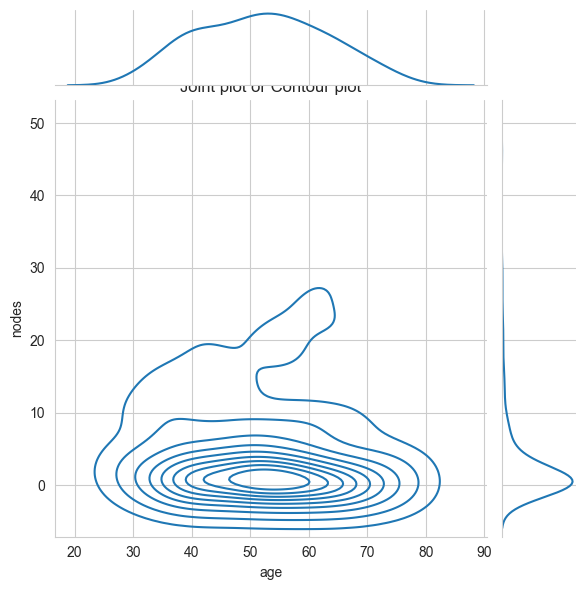

In [46]:
#Contour plots
sns.jointplot(x='age',y='nodes',data=status_1,kind='kde')
plt.legend
plt.title('Joint plot or Contour plot')

plt.show

**Observations**

*This is a 2-D density plot , also called as contour plots. Here we took age and nodes as the parameters. We can see for people who survived more than 5 uears are people usually between 50-60 years of age and the no of nodes they had is from 0-5*

**                ------------------------------              **


**                ------------------------------              **


**                ------------------------------              **


**Conclusion**

**By doing various plot analysis, graph representations and some approximation we can try to predict a model to predict cancer. Obviously it wont have a high rate of success rate but it can be made with more data.**

**By simple if..else python code we can distinguish and predict it nicely.**

